<a href="https://colab.research.google.com/github/hegame1998/Suicide-Statistic/blob/main/WHO_Suicide_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the modules & libraries**

In [57]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Importing**

I called the data from  my GitHub and put them in a specific variable to use it in future analysis.

In [58]:
# creating the suicide dataframe
suicide_df = pd.read_csv('https://raw.githubusercontent.com/hegame1998/Suicide-Statistic/main/who_suicide_statistics.csv')

# **Information about dataset**

In [59]:
# returning suicide dataframe values
suicide_df

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
...,...,...,...,...,...,...
43771,Zimbabwe,1990,male,25-34 years,150.0,NaN
43772,Zimbabwe,1990,male,35-54 years,132.0,NaN
43773,Zimbabwe,1990,male,5-14 years,6.0,NaN
43774,Zimbabwe,1990,male,55-74 years,74.0,NaN


In previous code, at the end of dataset we can see the size of data (number of rows and columns) but we can see it with another code :

In [60]:
suicide_df.shape

(43776, 6)

If I want to return the numbers of row of dataset :

In [61]:
# returning the number of rows in suicide dataframe
suicide_df.shape[0]

43776

This method is used to retrieve the first few rows of the dataset.
It returns 5 rows by default, but we can call for specific rows.
We call 8 rows here, so it will return the first 8 rows of the dataset.

In [62]:
# returning first n rows of suicide dataset
suicide_df.head(8)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
5,Albania,1985,female,75+ years,NaN,34200.0
6,Albania,1985,male,15-24 years,NaN,301400.0
7,Albania,1985,male,25-34 years,NaN,264200.0


This code same as last code but print the last rows of dataset

In [63]:
# returning last n rows of suicide dataset
suicide_df.tail(3)

,country,year,sex,age,suicides_no,population
43773,Zimbabwe,1990,male,5-14 years,6.0,NaN
43774,Zimbabwe,1990,male,55-74 years,74.0,NaN
43775,Zimbabwe,1990,male,75+ years,13.0,NaN


This method provides a concise summary of the dataset's information, including the number of non-null entries and the data types of each column.<br>This is useful for understanding the data types in dataset and identifying any missing values so we can clean the data if there is any empty cell.

In [64]:
# getting information about each column counts and datatype in suicide dataframe
suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


This method is used to generate descriptive statistics of the data.
For a dataset, it provides a summary of the central tendency, dispersion, and shape of the distribution of the data. For each numeric column in the dataset, it calculates statistics such as count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum.

In [65]:
# getting information like min,max and mean about numeric columns in suicide dataframe
suicide_df.describe()

,year,suicides_no,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


# **Cleaning dataset**

Cleaning the dataset before analysis is a fundamental step to ensuring the quality, reliability, and integrity of results. It allows for a perfect analysis and helps in drawing accurate and meaningful conclusions.


### **Calculate null cells**


I want to print the values that has null value.

In [66]:
#show the value that are nulls
null_colls = [i for i in suicide_df.columns if suicide_df[i].isnull().any()]
null_colls

['suicides_no', 'population']

Now I want to calculate the number of null cells.

In [67]:
#calculate the number of null cells for each value
suicide_df.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

### **Cleaning base on *'suicides_no'***

I remove the null cells:

In [68]:
# removing rows containing null values of suicides number column
suicide_df.dropna(subset=['suicides_no'], inplace=True)

### **Cleaning base on *'population'***

I remove the null cells:

In [69]:
# removing rows containing null values of population column
suicide_df.dropna(subset=['population'], inplace=True)

Now I want to sure about null cells because I want a clean dataset for my analysis

In [70]:
# getting information about each column counts and datatype in suicide dataframe
suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36060 entries, 24 to 43763
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      36060 non-null  object 
 1   year         36060 non-null  int64  
 2   sex          36060 non-null  object 
 3   age          36060 non-null  object 
 4   suicides_no  36060 non-null  float64
 5   population   36060 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.9+ MB


In [71]:
#calculate the number of null cells for each value
suicide_df.isnull().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

### **Converting value base on *'population'***

Converting the value from string to integer for value of sex

In [72]:
# replacing string values of sex with integer values
suicide_df.sex.replace({'female':1, 'male':2}, inplace=True)

### **Converting value base on *'age'***

Converting the value from string to integer for value of Age, first I print all unique values

In [73]:
# Print unique values of Country
suicide_df["age"].unique()

array(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'], dtype=object)

In [74]:
# replacing string values of age with integer values
suicide_df.age.replace({'5-14 years':1, '15-24 years':2, '25-34 years':3, '35-54 years':4, '55-74 years':5, '75+ years':6}, inplace=True)

# **Exploration on clean dataset**

Now I explore the dataset again that I cleaned.

In [75]:
# returning the number of rows and columns in suicide dataset that cleaning
suicide_df.shape

(36060, 6)

In [76]:
# getting information about each column counts and datatype in suicide dataframe
suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36060 entries, 24 to 43763
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      36060 non-null  object 
 1   year         36060 non-null  int64  
 2   sex          36060 non-null  int64  
 3   age          36060 non-null  int64  
 4   suicides_no  36060 non-null  float64
 5   population   36060 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.9+ MB


This is a pandas dataset method used to compute pair correlation of columns, excluding null values. <br> It computes the correlation matrix for the numerical columns in the DataFrame

In [77]:
# finding correlation between different feaures
suicide_df[['year', 'sex', 'age', 'suicides_no', 'population']].corr()

,year,sex,age,suicides_no,population
year,1.000000e+00,-1.205969e-16,2.837968e-18,-0.011356,0.012601
sex,-1.205969e-16,1.000000e+00,1.478274e-18,0.136476,-0.010822
age,2.837968e-18,1.478274e-18,1.000000e+00,0.075336,-0.069339
suicides_no,-1.135649e-02,1.364758e-01,7.533582e-02,1.000000,0.611406
population,1.260078e-02,-1.082212e-02,-6.933916e-02,0.611406,1.000000


###**Explore about *'suicide number***

Here I explore the number of suiciders base on different countries

In [78]:
# number of suicide by country
suicider_by_country = suicide_df.groupby('country')['suicides_no'].sum()
suicider_by_country.sort_values(ascending=False)

country
Russian Federation          1500992.0
United States of America    1201401.0
Japan                        937614.0
France                       395500.0
Ukraine                      365170.0
                              ...    
Mayotte                           6.0
Sao Tome and Principe             4.0
Dominica                          4.0
Cayman Islands                    0.0
Saint Kitts and Nevis             0.0
Name: suicides_no, Length: 118, dtype: float64

In [79]:
# top 5 countries with highest number of suicides
top_5_suicide_by_country = suicider_by_country.sort_values(ascending=False).head()

top_5_suicide_by_country

country
Russian Federation          1500992.0
United States of America    1201401.0
Japan                        937614.0
France                       395500.0
Ukraine                      365170.0
Name: suicides_no, dtype: float64

In [80]:
# last 5 countries with lowest number of suicides
last_5_suicide_by_country = suicider_by_country.sort_values(ascending=False).tail()

last_5_suicide_by_country

country
Mayotte                  6.0
Sao Tome and Principe    4.0
Dominica                 4.0
Cayman Islands           0.0
Saint Kitts and Nevis    0.0
Name: suicides_no, dtype: float64

Number of suiciders ase on their genders, in previous codes I convert the values of female to 1 and male to 2. **[1: Female, 2: Male]**

In [81]:
# number of suiciders by gender
suicider_by_sex = suicide_df.groupby('sex')['suicides_no'].sum()
suicider_by_sex

sex
1    1894294.0
2    6104173.0
Name: suicides_no, dtype: float64

The ratio of suicider base on sex that calculates how many times the number of suiciders for the sex represented by index 2 (Male) is compared to the number of suiciders for the sex represented by index 1 (Female).

In [82]:
# ratio number of suiciders by gender
suicider_by_sex[2]/ suicider_by_sex[1]

3.222400007601777

Base on above code we can see the numbers of suicider of Male is 3times more than Female.



---
Numbers of suiciders base on their age, in previous codes I convert the values the column of age base on this: <br> **'5-14 years':1, '15-24 years':2, '25-34 years':3, '35-54 years':4, '55-74 years':5, '75+ years':6**


In [83]:
# number of suiciders by age range
suicider_by_age = suicide_df.groupby('age')['suicides_no'].sum()
suicider_by_age

age
1      62320.0
2     975700.0
3    1360780.0
4    2887740.0
5    1955150.0
6     756777.0
Name: suicides_no, dtype: float64

###**Explore about *'country***

I want to explore about data that is related to countries so first I want to print all name of countries that are in this dataset.

In [84]:
# Print unique values of Country
suicide_df["country"].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei Darussalam',
       'Bulgaria', 'Cabo Verde', 'Canada', 'Cayman Islands', 'Chile',
       'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominica', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France',
       'French Guiana', 'Georgia', 'Germany', 'Greece', 'Grenada',
       'Guadeloupe', 'Guatemala', 'Guyana', 'Hong Kong SAR', 'Hungary',
       'Iceland', 'Iran (Islamic Rep of)', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Macau',
       'Maldives', 'Malta', 'Martinique', 'Mauritius', 'Mayotte',
       'Mexico', 'Mongolia', 'Montenegro', 'Netherlands', 'New 

Number of suicider in **Switzerland** .

In [85]:
# number of suiciders in Switzerland
suicide_df[suicide_df['country'] == 'Switzerland']['suicides_no'].sum()

26217.0

Now I want to print how many of Switzerland suiciders are **Female** or **Male** .

In [86]:
# number of suiciders by gender in Switzerland
suicide_df.loc[suicide_df['country'] == "Switzerland"].groupby('sex')['suicides_no'].sum()

sex
1     7739.0
2    18478.0
Name: suicides_no, dtype: float64

Numbers of Switzerland suiciders base on their age: <br> **'5-14 years':1, '15-24 years':2, '25-34 years':3, '35-54 years':4, '55-74 years':5, '75+ years':6**

In [87]:
# number of suiciders by age in Switzerland
suicide_df.loc[suicide_df['country'] == "Switzerland"].groupby('age')['suicides_no'].sum()

age
1      70.0
2    2015.0
3    2867.0
4    8846.0
5    7707.0
6    4712.0
Name: suicides_no, dtype: float64

Numbers of Switzerland suiciders base on different **years**.

In [88]:
# number of suiciders of Switzerland in different years
suicide_df.loc[suicide_df['country'] == "Switzerland"].groupby('year')['suicides_no'].sum()

year
1995    1419.0
1996    1432.0
1997    1341.0
1998    1371.0
1999    1296.0
2000    1380.0
2001    1338.0
2002    1446.0
2003    1269.0
2004    1284.0
2005    1299.0
2006    1309.0
2007    1360.0
2008    1314.0
2009    1105.0
2010    1006.0
2011    1034.0
2012    1038.0
2013    1071.0
2014    1032.0
2015    1073.0
Name: suicides_no, dtype: float64

###**Explore about *'woman & man'***

Numbers of suiciders of woman in different countries.

In [89]:
# suicide among women
suicide_df.loc[suicide_df['sex'] == 1].groupby('country')['suicides_no'].sum().sort_values(ascending=False)

country
Japan                       298333.0
Russian Federation          279518.0
United States of America    253609.0
France                      108619.0
Republic of Korea            82615.0
                              ...   
Saint Kitts and Nevis            0.0
Cayman Islands                   0.0
Dominica                         0.0
Mayotte                          0.0
Oman                             0.0
Name: suicides_no, Length: 118, dtype: float64

Numbers of woman and **woman** that suicide in Iran.


In [90]:
# number of woman suiciders in Iran
suicide_df.loc[(suicide_df['country'] == 'Iran (Islamic Rep of)') & (suicide_df['sex'] == 1)]['suicides_no'].sum()

2322.0

Numbers of suiciders of man in different countries.

In [91]:
# suicide among me
suicide_df.loc[suicide_df['sex'] == 2].groupby('country')['suicides_no'].sum().sort_values(ascending=False)

country
Russian Federation          1221474.0
United States of America     947792.0
Japan                        639281.0
Ukraine                      293561.0
France                       286881.0
                              ...    
Bermuda                           5.0
Dominica                          4.0
Sao Tome and Principe             3.0
Cayman Islands                    0.0
Saint Kitts and Nevis             0.0
Name: suicides_no, Length: 118, dtype: float64

Numbers of woman and **man** that suicide in Iran.


In [92]:
# number of man suiciders in Iran
suicide_df.loc[(suicide_df['country'] == 'Iran (Islamic Rep of)') & (suicide_df['sex'] == 2)]['suicides_no'].sum()

4977.0

#**Visualization**

The graph of correlations of values.

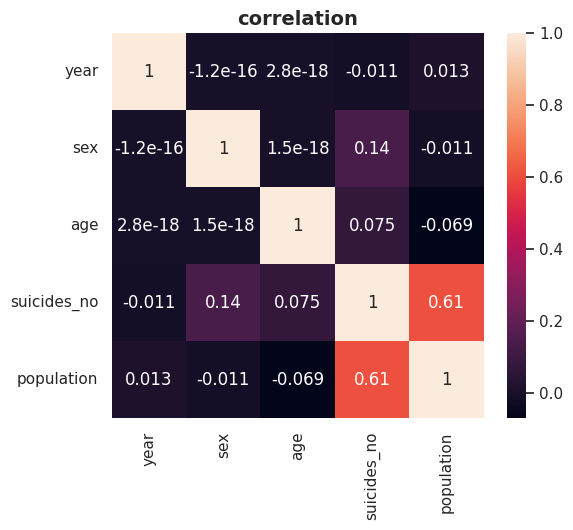

In [93]:
# correlation graph
plt.figure(figsize=(6,5))
sns.heatmap(suicide_df[['year', 'sex', 'age', 'suicides_no', 'population']].corr(), annot=True)
plt.title('correlation', fontweight='bold', fontsize=14)
plt.show()

The percentages of each gender that are in the dataset.

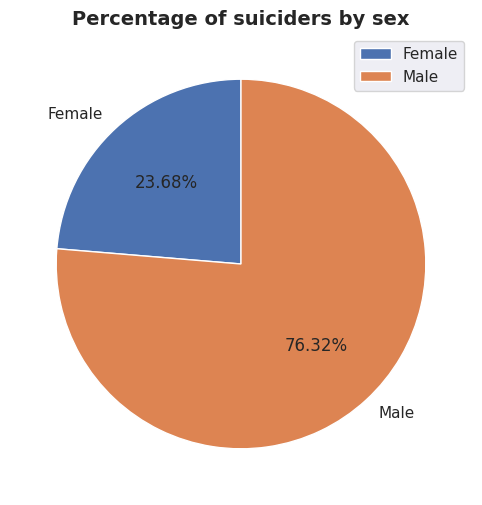

In [94]:
# Suiciders by sex
labels = ['Female', 'Male']
plt.figure(figsize=(10,6))
plt.pie(suicider_by_sex, labels=labels, autopct='%.2f%%', startangle=90, shadow=False)
plt.title('Percentage of suiciders by sex', fontweight='bold', fontsize=14)
plt.legend()
plt.show()

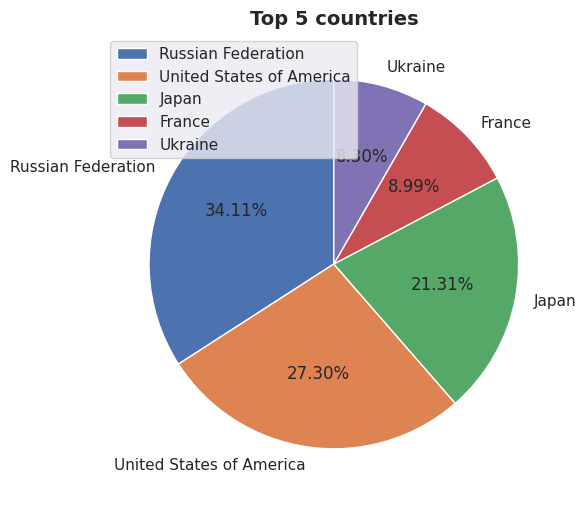

In [95]:
# top 5 countries
labels = ['Russian Federation', 'United States of America', 'Japan', 'France', 'Ukraine']
plt.figure(figsize=(10,6))
plt.pie(top_5_suicide_by_country,labels= labels, autopct='%.2f%%', startangle=90)
plt.title('Top 5 countries', fontweight='bold', fontsize=14)
plt.legend()
plt.legend(loc="upper left")
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Russian Federation'),
  Text(1, 0, 'United States of America'),
  Text(2, 0, 'Japan'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Ukraine'),
  Text(5, 0, 'Germany'),
  Text(6, 0, 'Republic of Korea'),
  Text(7, 0, 'Brazil'),
  Text(8, 0, 'Poland'),
  Text(9, 0, 'United Kingdom'),
  Text(10, 0, 'Italy'),
  Text(11, 0, 'Hungary'),
  Text(12, 0, 'Thailand'),
  Text(13, 0, 'Canada'),
  Text(14, 0, 'Kazakhstan'),
  Text(15, 0, 'Mexico'),
  Text(16, 0, 'Spain'),
  Text(17, 0, 'Argentina'),
  Text(18, 0, 'Sri Lanka'),
  Text(19, 0, 'Australia')])

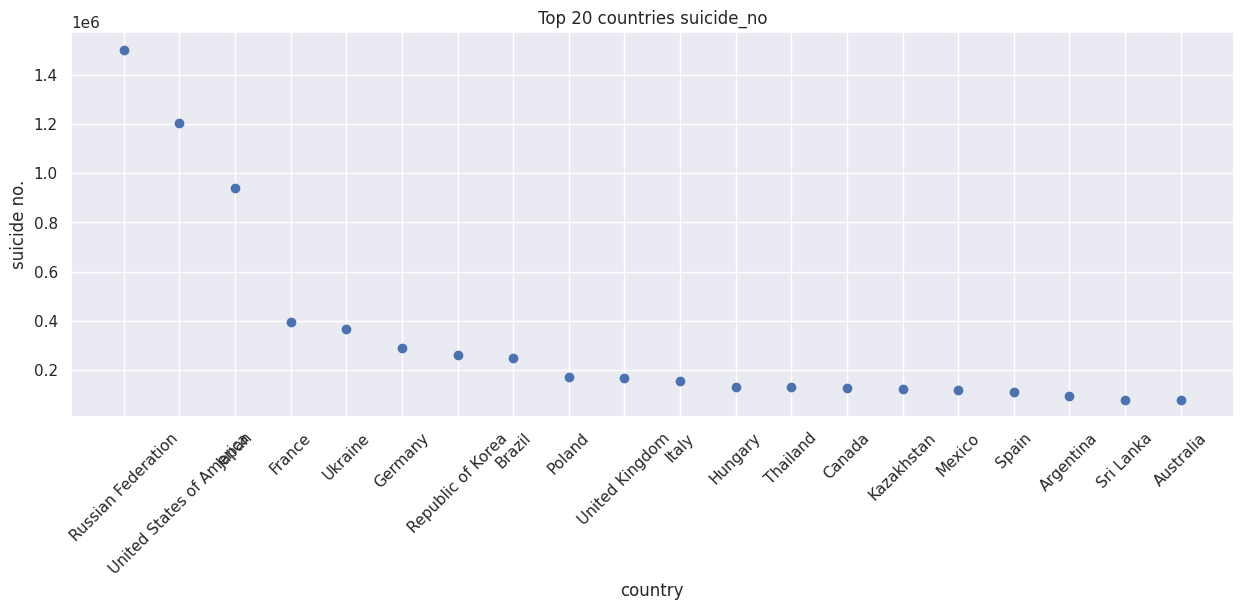

In [96]:
# 20 country of highest suicide rate
plt.figure(figsize=(15,5))
suicider_by_20c=list(suicide_df["suicides_no"].groupby(suicide_df["country"]).sum().sort_values(ascending=False).keys())[0:20]
suicider_by_20n=list(suicide_df["suicides_no"].groupby(suicide_df["country"]).sum().sort_values(ascending=False))[0:20]
plt.scatter(suicider_by_20c,suicider_by_20n)
plt.xlabel("country")
plt.ylabel("suicide no.")
plt.title("Top 20 countries suicide_no")
plt.xticks(rotation=45)

Text(0.5, 1.0, 'number of suicides during years')

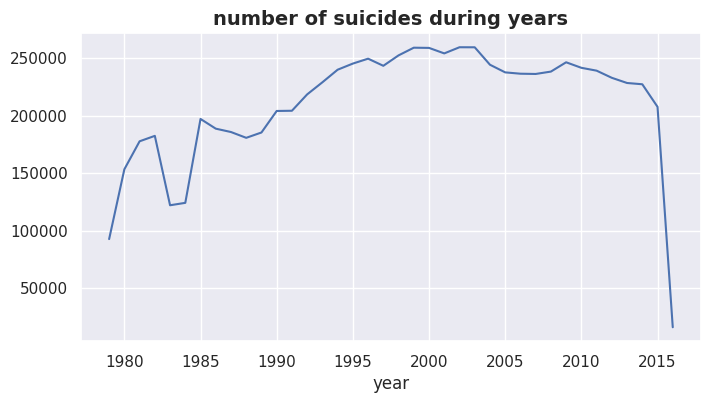

In [97]:
# Numbers of suicider during the years
suicide_df.groupby('year')['suicides_no'].sum().plot(kind='line', figsize=(8, 4))
plt.title('number of suicides during years', fontweight='bold', fontsize=14)

Text(0.5, 1.0, 'number of suicides by age')

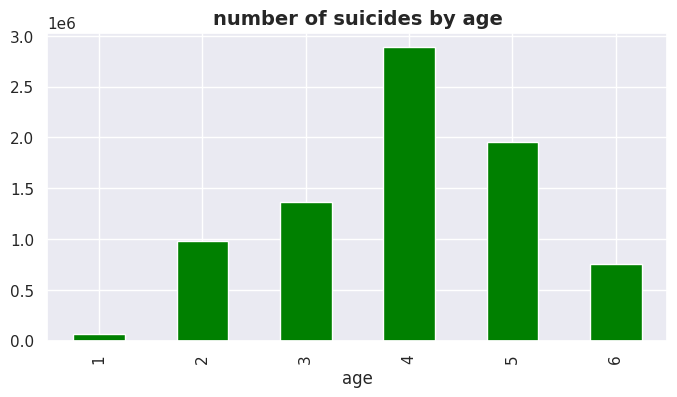

In [98]:
# number of suiciders by age range
suicider_by_age.plot(kind='bar', color='green', figsize=(8, 4))
plt.title('number of suicides by age', fontweight='bold', fontsize=14)

Text(0.5, 1.0, 'number of suicides during years in Switzerland')

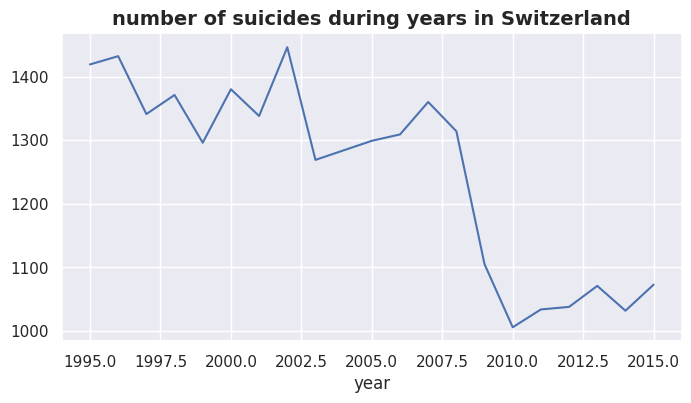

In [99]:
# number of suiciders of Switzerland in different years
suicide_df.loc[suicide_df['country'] == "Switzerland"].groupby('year')['suicides_no'].sum().plot(kind='line', figsize=(8, 4))
plt.title('number of suicides during years in Switzerland', fontweight='bold', fontsize=14)

Text(0.5, 1.0, 'number of suicides during years in Russia')

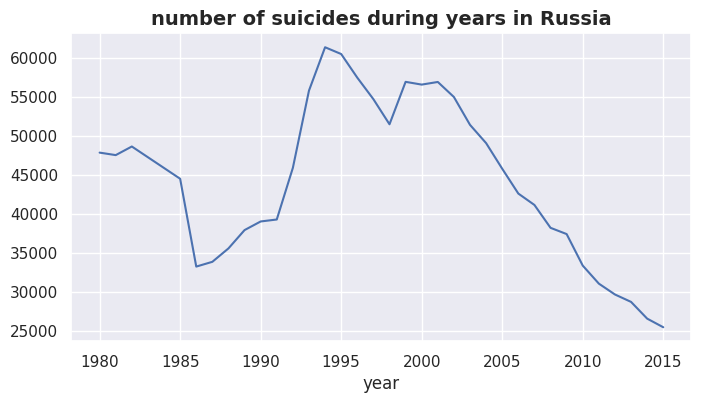

In [100]:
# number of suiciders of Russian in different years
suicide_df.loc[suicide_df['country'] == "Russian Federation"].groupby('year')['suicides_no'].sum().plot(kind='line', figsize=(8, 4))
plt.title('number of suicides during years in Russia', fontweight='bold', fontsize=14)

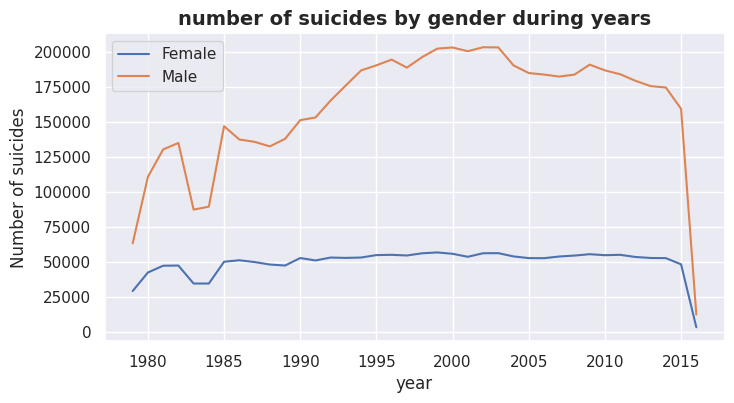

In [101]:
# suiciders of women and men in one graph
suicide_df.loc[suicide_df['sex'] == 1].groupby('year')['suicides_no'].sum().plot(kind='line', figsize=(8, 4),  label='Female')
suicide_df.loc[suicide_df['sex'] == 2].groupby('year')['suicides_no'].sum().plot(kind='line', label='Male')
plt.title('number of suicides by gender during years', fontweight='bold', fontsize=14)
plt.ylabel('Number of suicides')
plt.legend()
plt.show()

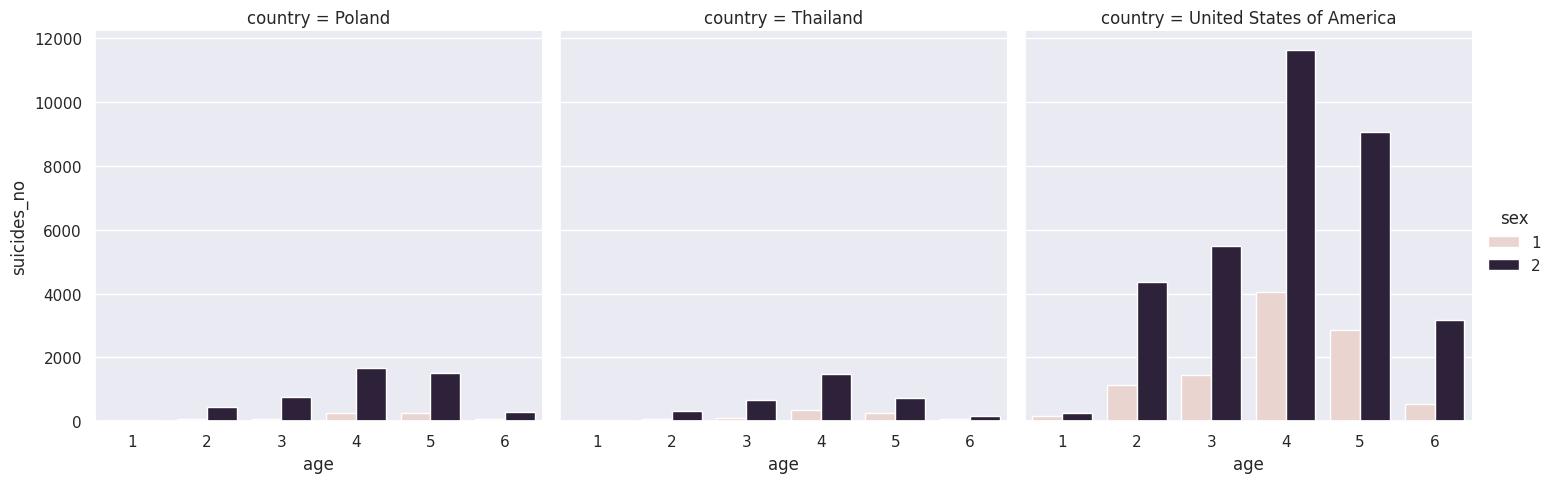

In [102]:
# seaborn sof 3 countries
sns.set()

# chart data
chart = (suicide_df.loc[(suicide_df['country'].isin(['Poland','Thailand','United States of America'])) & (suicide_df['year'] == 2015), ['country','sex','age','suicides_no']].sort_values(['sex','age']))

sns.catplot(x='age', hue='sex', col='country', y='suicides_no', data=cd, kind='bar', col_wrap=3)

#**Modelling**

In [103]:
# importing required tools from sklearn library
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [104]:
# defining function for changing string values to numeric values for better modelling
def encode_df(dataframe):
    le = LabelEncoder()
    for column in dataframe.columns:
        dataframe[column] = le.fit_transform(dataframe[column])
    return dataframe